In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

Here we restrict oursleves to the top 10 000 most frequent words.
As shown below no word index is more than 10 000.

In [4]:
max([max(sequence) for sequence in train_data])

9999

# Data preparation

1. Decoding reviews


In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_review = ''.join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

2. Encoding integer sequences via multi-hot encoding for neural network learning

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1
  return results


x_train = vectorize_sequences(train_data)
x_test  = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Building the model

1. Model architecture

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(16, activation='relu')
                      ,layers.Dense(16, activation='relu'),
                          layers.Dense(1, activation = 'sigmoid')])



model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])


 2. Creating a validation set

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

 3. Training the model

*train the model using 20 epochs on all training data using mini batches of 400 samples. We also measure the validation error.*

In [10]:
history = model.fit(partial_x_train,partial_y_train,epochs=20, batch_size=512,
                    validation_data= (x_val,y_val))



Epoch 1/20
30/30 [==============================] - 5s 133ms/step - loss: 0.5270 - accuracy: 0.7811 - val_loss: 0.3969 - val_accuracy: 0.8656
Epoch 2/20
30/30 [==============================] - 1s 44ms/step - loss: 0.3230 - accuracy: 0.8961 - val_loss: 0.3118 - val_accuracy: 0.8852
Epoch 3/20
30/30 [==============================] - 2s 55ms/step - loss: 0.2437 - accuracy: 0.9183 - val_loss: 0.2851 - val_accuracy: 0.8890
Epoch 4/20
30/30 [==============================] - 2s 54ms/step - loss: 0.1950 - accuracy: 0.9345 - val_loss: 0.2757 - val_accuracy: 0.8883
Epoch 5/20
30/30 [==============================] - 1s 43ms/step - loss: 0.1636 - accuracy: 0.9468 - val_loss: 0.2782 - val_accuracy: 0.8865
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1399 - accuracy: 0.9548 - val_loss: 0.3051 - val_accuracy: 0.8821
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.1188 - accuracy: 0.9632 - val_loss: 0.3078 - val_accuracy: 0.8786
Epoch 8/20
3

In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

4. Plotting training and validation metrics

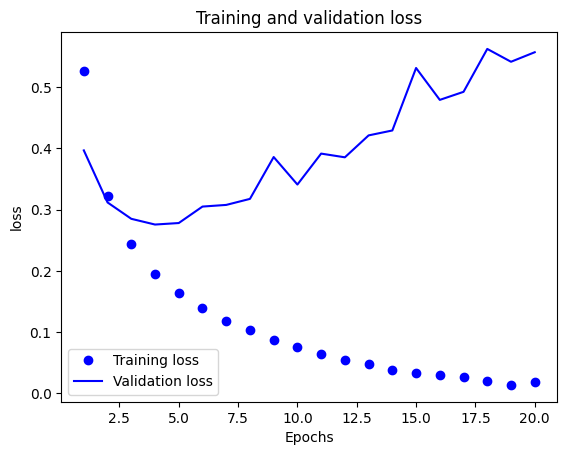

In [12]:
import matplotlib.pyplot as plt
loss_val = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_val)+1)
plt.plot(epochs, loss_val, 'bo', label = 'Training loss ')
plt.plot(epochs, val_loss_values, 'b', label= 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


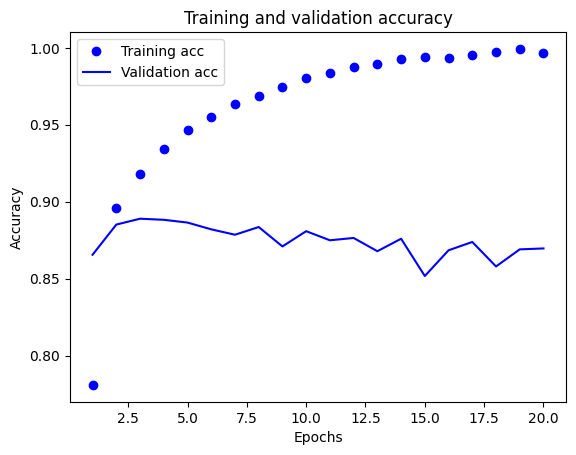

In [13]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In the above two graphs, we observe that the validation loss seems to increase at the 4th epoch . Similarly, the validation acccuracy seems to reach a minimum at the 4th epoch. After the 4th epoch, the model seems to overfit the training data. Thus, we will train our model using 4 epochs

5. Training optimal model given by 4 epochs

In [14]:
model_two = keras.Sequential([layers.Dense(16, activation='relu'), layers.Dense(16, activation = 'relu' ),
                              layers.Dense(1, activation='sigmoid')])

model_two.compile(optimizer= 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model_two.fit(x_train,y_train, epochs=4, batch_size=812)
results = model_two.evaluate(x_test,y_test)

Epoch 1/4
31/31 [==============================] - 2s 48ms/step - loss: 0.5129 - accuracy: 0.7786
Epoch 2/4
31/31 [==============================] - 1s 46ms/step - loss: 0.3123 - accuracy: 0.8898
Epoch 3/4
31/31 [==============================] - 1s 45ms/step - loss: 0.2387 - accuracy: 0.9175
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.3128 - accuracy: 0.8703


# Generate predicitons on new data

In [15]:
model_two.predict(x_test)[0][0]


782/782 [==============================] - 2s 3ms/step


0.19526182

The first review has a likelihood of 19% of being positive